In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [18]:
faile_path=r"C:\Users\DELL\Desktop\data\ENB2012_data.xlsx"
df=pd.read_excel(faile_path)
print(df.head())
print(df.describe())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    

In [19]:
#preprocessing 1:cheak missing values
print(df.isnull().sum())



X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [20]:

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

#input features(take first 8 colummns)
X = df.iloc[:, 0:8]

# Normalize the feature columns (X1 to X8)
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]

# Fit and transform the feature columns
X_normalized = scaler.fit_transform(X)

#new DataFrame with normalize features
df_normalized=pd.DataFrame(X_normalized, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])

#add y and y2
y1 = df['Y1']
y2 = df['Y2']

print(df_normalized.head())


         X1        X2        X3        X4   X5        X6   X7   X8
0  1.000000  0.000000  0.285714  0.000000  1.0  0.000000  0.0  0.0
1  1.000000  0.000000  0.285714  0.000000  1.0  0.333333  0.0  0.0
2  1.000000  0.000000  0.285714  0.000000  1.0  0.666667  0.0  0.0
3  1.000000  0.000000  0.285714  0.000000  1.0  1.000000  0.0  0.0
4  0.777778  0.166667  0.428571  0.111111  1.0  0.000000  0.0  0.0


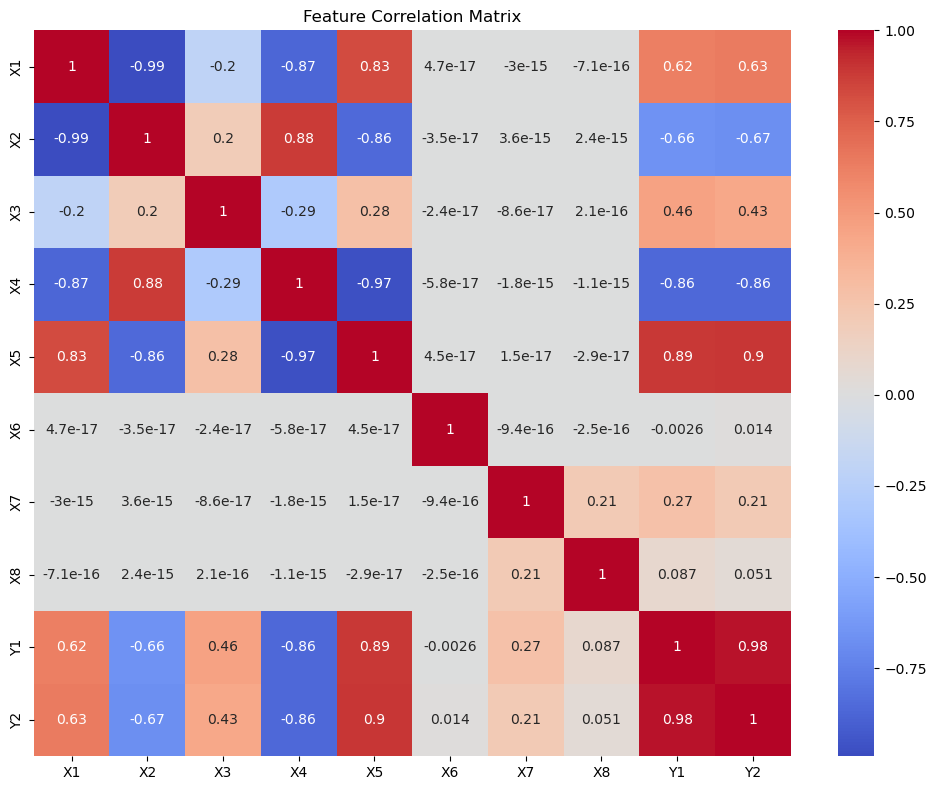

In [21]:
#visualization 
#correlation

# Heatmap with larger figure size
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()  # Adjusts padding to prevent overlap
plt.show()




In [22]:

# Split both Y1 and Y2 targets
X_train, X_test, y1_train, y1_test = train_test_split(X_normalized, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X_normalized, y2, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Train and predict for Y1
    model.fit(X_train, y1_train)
    y1_pred = model.predict(X_test)

    # Train and predict for Y2
    model.fit(X_train, y2_train)
    y2_pred = model.predict(X_test)

    # Store predictions
    results[name] = {
        "Y1_Pred": y1_pred,
        "Y2_Pred": y2_pred
    }

print("Linear Regression Y1 Predictions:", results["Linear Regression"]["Y1_Pred"][:5])
print("Linear Regression Y2 Predictions:", results["Linear Regression"]["Y2_Pred"][:5])


Linear Regression Y1 Predictions: [18.84838867 14.03491211 31.30102539 35.88208008 15.3190918 ]
Linear Regression Y2 Predictions: [19.7598877  16.77697754 32.03094482 36.7088623  17.28186035]


In [23]:
############# evaluatation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(true, pred):
    return {
        "MAE": mean_absolute_error(true, pred),
        "RMSE": np.sqrt(mean_squared_error(true, pred)),
        "R2": r2_score(true, pred)
    }

for model_name, preds in results.items():
    print(f"\n{model_name} - Heating Load:")
    print(evaluate(y1_test, preds["Y1_Pred"]))

    print(f"{model_name} - Cooling Load:")
    print(evaluate(y2_test, preds["Y2_Pred"]))



Linear Regression - Heating Load:
{'MAE': 2.183616807021104, 'RMSE': 3.026640612652081, 'R2': 0.9121141546926576}
Linear Regression - Cooling Load:
{'MAE': 2.195276909369927, 'RMSE': 3.14466983392975, 'R2': 0.8932738693719914}

Random Forest - Heating Load:
{'MAE': 0.3609123376623383, 'RMSE': 0.49849120112335027, 'R2': 0.9976159672475238}
Random Forest - Cooling Load:
{'MAE': 1.0649967532467517, 'RMSE': 1.7278809486744742, 'R2': 0.9677783120448462}

Gradient Boosting - Heating Load:
{'MAE': 0.3861333385160641, 'RMSE': 0.5150831994775414, 'R2': 0.9974546237181696}
Gradient Boosting - Cooling Load:
{'MAE': 1.057284580119634, 'RMSE': 1.5144255937710789, 'R2': 0.9752476443625325}
